Импортируем нужные библиотеки


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

Устанавливаем настройки для графиков

In [15]:
sns.set(
    font_scale=1.5,
    style = 'whitegrid',
    rc = {'figure.figsize':(20,7)}
)

Импортируем данные в ноутбук

In [16]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-shelekhov/MIDDLE PROJECT/olist_customers_dataset.csv')
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-shelekhov/MIDDLE PROJECT/olist_orders_dataset.csv')
order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-shelekhov/MIDDLE PROJECT/olist_order_items_dataset.csv')

### Таблица с уникальными идентификаторами пользователей
#### `customer_id` — позаказный идентификатор пользователя
#### `customer_unique_id` —  уникальный идентификатор пользователя  (аналог номера паспорта)
#### `customer_zip_code_prefix` —  почтовый индекс пользователя
#### `customer_city` —  город доставки пользователя
#### `customer_state` —  штат доставки пользователя

In [17]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Посмотрим на данные в этой таблице

In [18]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Посмотрим на то как распределены наши покупатели в зависимости от штата

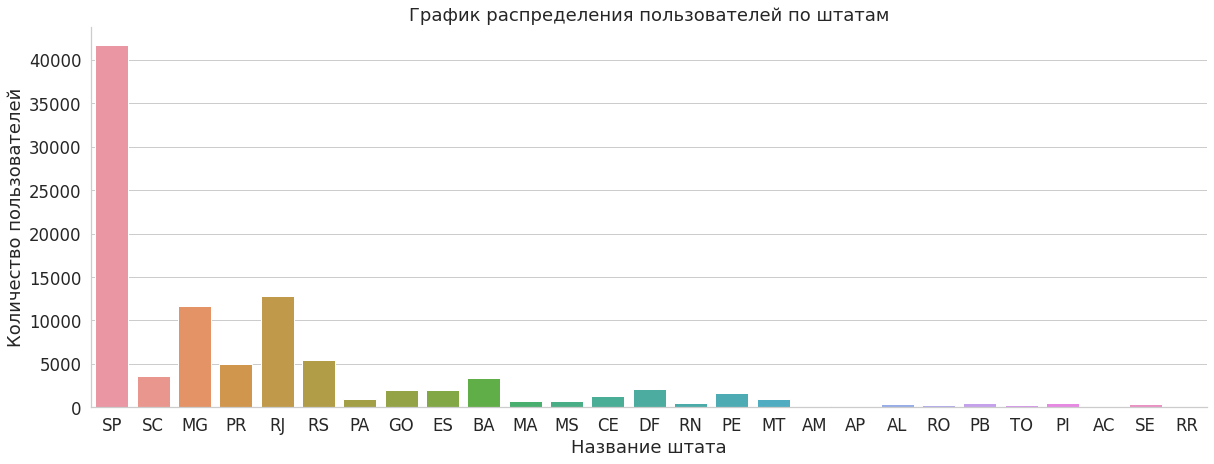

In [19]:
sns.countplot(data=customers, x='customer_state')
plt.title('График распределения пользователей по штатам')
plt.xlabel('Название штата')
plt.ylabel('Количество пользователей')
sns.despine()  # убрать часть рамки графика
plt.show()

### Таблица заказов
#### `order_id` —  уникальный идентификатор заказа (номер чека)
#### `customer_id` —  позаказный идентификатор пользователя
#### `order_status` —  статус заказа
#### `order_purchase_timestamp` —  время создания заказа
#### `order_approved_at` —  время подтверждения оплаты заказа
#### `order_delivered_carrier_date` —  время передачи заказа в логистическую службу
#### `order_delivered_customer_date` —  время доставки заказа
#### `order_estimated_delivery_date` —  обещанная дата доставки

In [20]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Посмотрим на информацию по данным в этой таблице

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Товарные позиции, входящие в заказы
#### `order_id` —  уникальный идентификатор заказа (номер чека)
#### `order_item_id` —  идентификатор товара внутри одного заказа
#### `product_id` —  ид товара (аналог штрихкода)
#### `seller_id` — ид производителя товара
#### `shipping_limit_date` —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
#### `price` —  цена за единицу товара
#### `freight_value` —  вес товара

In [22]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Посмотрим на информацию по данным в этой таблице

In [23]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Для решения задачи необходимо провести предварительное исследование данных и сформулировать, что должно считаться покупкой.

Для этого необходимо посмотреть на таблицу заказов

In [24]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Посмотрим какие статусы заказов у нас есть

In [25]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Для удобства визуализируем это распределение

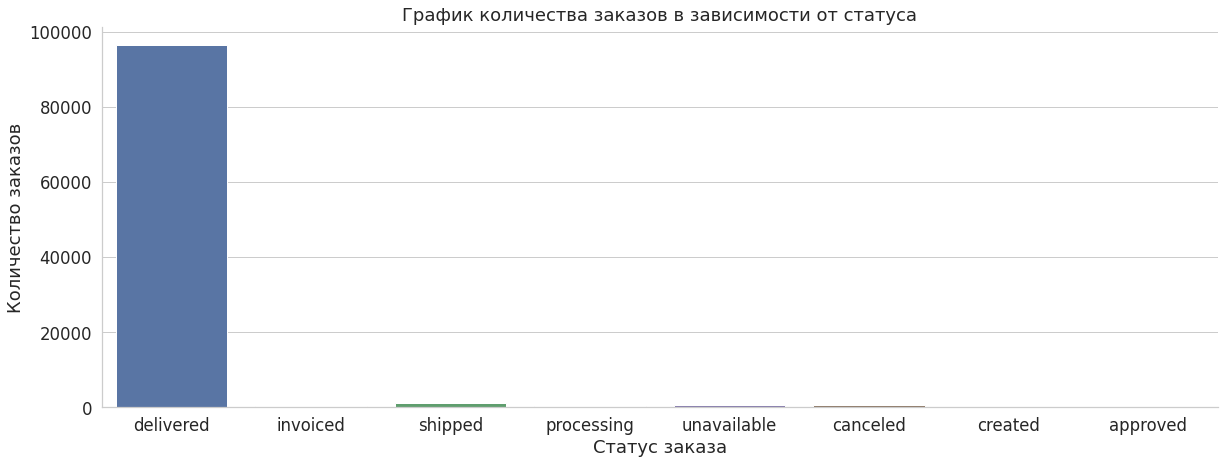

In [26]:
sns.countplot(data=orders, x='order_status')
plt.title('График количества заказов в зависимости от статуса')
plt.xlabel('Статус заказа')
plt.ylabel('Количество заказов')
sns.despine()  # убрать часть рамки графика
plt.show()

Большинство товаров у нас со статусом delivered, посмотрим на них повнимательней

In [27]:
orders.query('order_status == "delivered"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   customer_id                    96478 non-null  object
 2   order_status                   96478 non-null  object
 3   order_purchase_timestamp       96478 non-null  object
 4   order_approved_at              96464 non-null  object
 5   order_delivered_carrier_date   96476 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  96478 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [28]:
orders.query('order_status == "delivered"').isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

#### Есть несколько пропущенных значений, но так как у нас нет понятия о том как выставляется статус доставлено, то в качестве покупки можно смело считать все товары со статусом delivered - а значит товары которые помимо того что были оплачены, еще и имеют конкретное время доставки

# ВОПРОС 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

Чтобы посчитать количество пользователей нужно смерджить таблицу с покупателями и с заказами

In [29]:
customers_with_orders = customers.merge(orders, on='customer_id')
customers_with_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Теперь определим пользователей у которых customer_unique_id содержит только один customer_id

In [30]:
one_time_customers = customers_with_orders \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'customer_id': 'count'}) \
    .rename(columns={'customer_id': 'number_of_purchases'}) \
    .sort_values('number_of_purchases', ascending=False) \
    .query('number_of_purchases == 1')
one_time_customers.head()

,customer_unique_id,number_of_purchases
65416,adfdc84671ccd55dc3c4aa31b363bfb4,1
65652,ae9ae5072fe8d5b2a1f7072a833f0afc,1
64300,aaff146bd210808c7d004a05966472a7,1
65653,ae9b625c590bbfdd9e9ef836fbcbc7c9,1
65654,ae9b719375655dab3c518d76cc37a843,1


Теперь сделаем мердж между двумя датафреймами и оставим только пользователей из датафрейма таблицы one_time_customers

In [31]:
customers_with_orders_one_time = one_time_customers.merge(customers_with_orders, on='customer_unique_id')
customers_with_orders_one_time.head()

,customer_unique_id,number_of_purchases,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,adfdc84671ccd55dc3c4aa31b363bfb4,1,5dfc4ad0a5d369a091d3f7f011ff8cad,2407,sao paulo,SP,a8ebe927b1b85cc950bba001cac770f7,unavailable,2017-12-06 19:45:34,2017-12-06 19:56:20,NaN,NaN,2017-12-22 00:00:00
1,ae9ae5072fe8d5b2a1f7072a833f0afc,1,b7036379c8ca6db063c7e288cdea5094,3335,sao paulo,SP,14f31f8bfd37cf6b1fa6a4aa6e94e930,delivered,2018-02-27 15:42:55,2018-02-27 15:55:33,2018-02-28 22:17:53,2018-03-05 22:57:53,2018-03-14 00:00:00
2,aaff146bd210808c7d004a05966472a7,1,1c5b37d20011c637ad1a5b6d423c7483,24431,sao goncalo,RJ,0132451f29a10b66a5cf1bacc85f9afe,delivered,2017-11-08 17:08:56,2017-11-09 17:08:27,2017-11-10 18:48:59,2017-11-17 18:58:42,2017-12-07 00:00:00
3,ae9b625c590bbfdd9e9ef836fbcbc7c9,1,f29933fff30fd131172ff842eaee564a,99840,sananduva,RS,f082f28d8497b7ec4f89389dc373c7a6,delivered,2017-07-25 18:12:38,2017-07-25 18:25:16,2017-07-27 21:37:50,2017-08-03 20:43:37,2017-08-18 00:00:00
4,ae9b719375655dab3c518d76cc37a843,1,6f112dd10f33826462a528bcede68046,23560,rio de janeiro,RJ,b7abd082ee6dd79ee1e8b2eba07d86b3,delivered,2017-11-17 19:55:20,2017-11-17 20:56:06,2017-11-22 21:25:26,2017-11-24 21:08:50,2017-11-30 00:00:00


Посчитаем теперь количество уникальных пользоватей у которых количество покупок = 1, a статус = "delivered"

In [32]:
customers_with_orders_one_time \
    .query('order_status == "delivered"') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_purchase_timestamp': 'count'}) \
    .shape[0]

90379

#### Ответ на первый вопрос: `90379`

# ВОПРОС 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

Посмотрим на типы данных в нашей таблице

In [33]:
customers_with_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


Переведем все даты в datetime

In [34]:
customers_with_orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = customers_with_orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

Проверим типы данных и пустые значения

In [35]:
customers_with_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [36]:
customers_with_orders.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

У нас есть 2965 заказов без даты доставки, давайте оставим только их и посмотрим внимательно

In [37]:
customers_with_orders['not_delivered'] = customers_with_orders.order_delivered_customer_date.isnull()
not_delivered = customers_with_orders.query("not_delivered != 0")
not_delivered 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,not_delivered
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09,True
47,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24,True
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20,True
79,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaT,2018-02-09,True
100,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaT,2017-09-11,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99248,6a65b5d6d4f4c9dfda93798cf014ee47,5b66137675c164a7df3b639bf1e86134,3959,sao paulo,SP,8c0dd54ff6a273a02de12494c6bf299f,shipped,2018-07-17 22:35:46,2018-07-18 21:22:25,2018-07-30 09:00:00,NaT,2018-08-02,True
99280,9ce70b8dafe76524f3d5e5e68cbf29f5,6edd9e4a22b7ab02db2a87f13bfd2d2a,14093,ribeirao preto,SP,e5e59fe47003046e2ed48ebb641564b2,shipped,2018-04-27 13:52:12,2018-04-27 14:09:00,2018-05-02 14:39:00,NaT,2018-05-23,True
99288,2a6fc1968c4a29c9c258bb1994afbc7f,205a1c797b2c6e626d560900a3ebde6b,27210,volta redonda,RJ,12d9fe1a3efa51a7fae337cba819adc1,shipped,2017-02-08 13:07:19,2017-02-09 02:50:42,2017-02-09 10:56:46,NaT,2017-03-17,True
99351,f83083fcbc51d12f8279b5713c2d4b4d,0465f164e35aba70f70e911b252513a9,77807,araguaina,TO,67384817c871ae183b24f9a0a6eb9bbc,shipped,2018-01-25 12:12:37,2018-01-25 12:31:27,2018-01-26 17:49:00,NaT,2018-03-01,True


Посмотрим на детализацию статусов

In [38]:
not_delivered.order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

Давайте посмотрим на распределение этих статусов по месяцам, за дату примем ожидаемую дату доставки

In [39]:
not_delivered_by_month = not_delivered \
    .groupby(['order_status', 'order_estimated_delivery_date'], as_index=False) \
    .agg({'customer_id': 'count'})
not_delivered_by_month.head()

,order_status,order_estimated_delivery_date,customer_id
0,approved,2017-03-01,1
1,approved,2017-05-22,1
2,canceled,2016-09-30,1
3,canceled,2016-10-24,1
4,canceled,2016-10-25,1


Приведем даты к началу месяца

In [40]:
not_delivered_by_month['order_estimated_delivery_date'] = pd.to_datetime(not_delivered_by_month.order_estimated_delivery_date).dt.to_period('M').dt.to_timestamp()
not_delivered_by_month = not_delivered_by_month.rename(columns={'order_estimated_delivery_date':'date'})
not_delivered_by_month.head()

,order_status,date,customer_id
0,approved,2017-03-01,1
1,approved,2017-05-01,1
2,canceled,2016-09-01,1
3,canceled,2016-10-01,1
4,canceled,2016-10-01,1


Посчитаем сколько в месяц в среднем не доставляется товаров

In [41]:
not_delivered_by_month_mean = not_delivered_by_month \
    .groupby('date', as_index=False) \
    .agg({'customer_id': 'mean'}) \
    .rename(columns={'customer_id':'mean_amount'}) \
    .sort_values('date', ascending=False)
not_delivered_by_month_mean.head()

,date,mean_amount
25,2018-11-01,1.000000
24,2018-10-01,1.200000
23,2018-09-01,2.523810
22,2018-08-01,3.041667
21,2018-07-01,2.139535


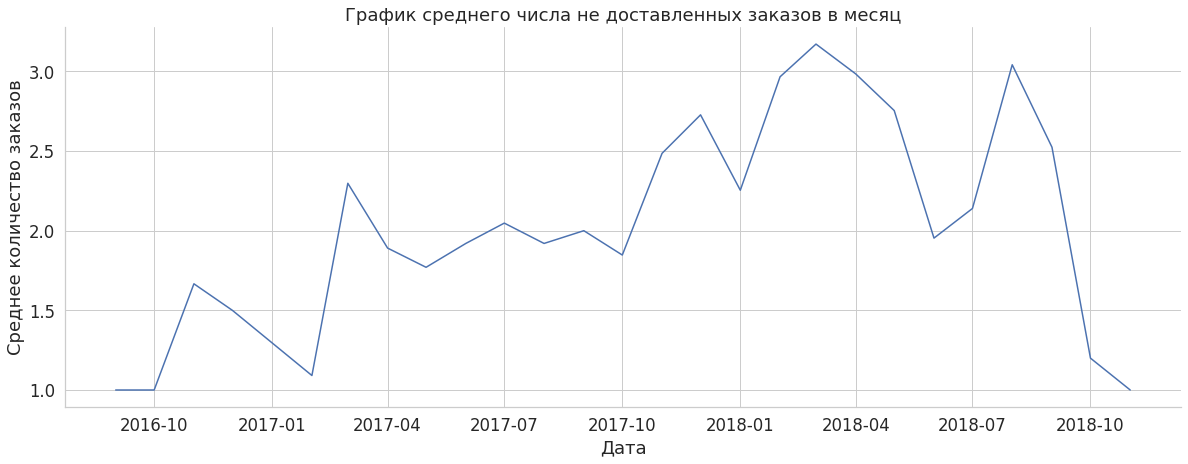

In [42]:
sns.lineplot(data=not_delivered_by_month_mean, x='date', y='mean_amount')
plt.title('График среднего числа не доставленных заказов в месяц')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
sns.despine()  # убрать часть рамки графика
plt.show()

А теперь посчитаем сколько в месяц в среднем не доставляется товаров с каждым статусом

In [43]:
not_delivered_by_month_det = not_delivered_by_month \
    .groupby(['date', 'order_status'], as_index=False) \
    .agg({'customer_id': 'mean'}) \
    .rename(columns={'customer_id':'mean_amount'}) \
    .sort_values('date', ascending=False)
not_delivered_by_month.head()

,order_status,date,customer_id
0,approved,2017-03-01,1
1,approved,2017-05-01,1
2,canceled,2016-09-01,1
3,canceled,2016-10-01,1
4,canceled,2016-10-01,1


Посмотрим теперь на графиках детализацию со статусом canceled и unavailable

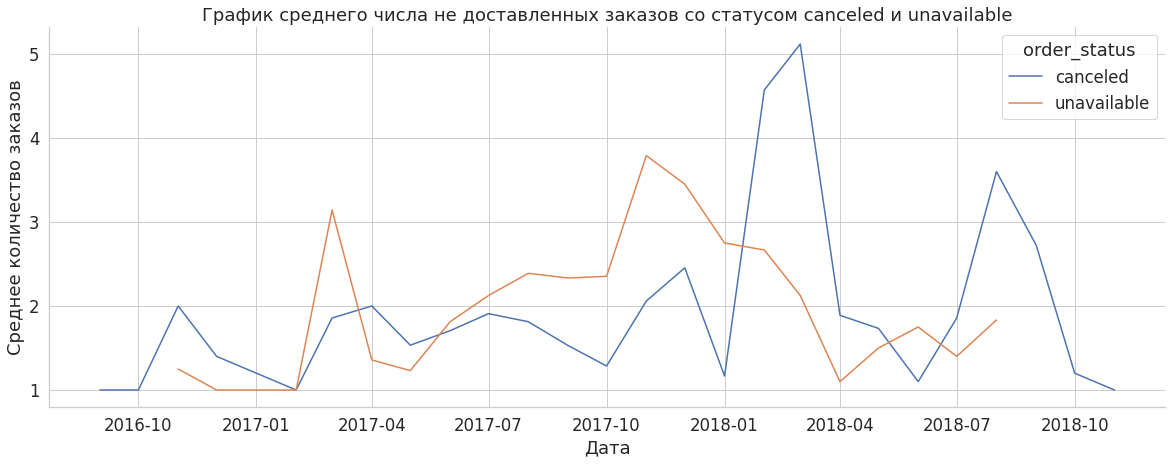

In [44]:
sns.lineplot(data=not_delivered_by_month_det.query('order_status == "canceled" or order_status == "unavailable"'), x='date', y='mean_amount', hue='order_status')
plt.title('График среднего числа не доставленных заказов со статусом canceled и unavailable')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
sns.despine()  # убрать часть рамки графика
plt.show()

Посмотрим на график остальных не доставленных заказов

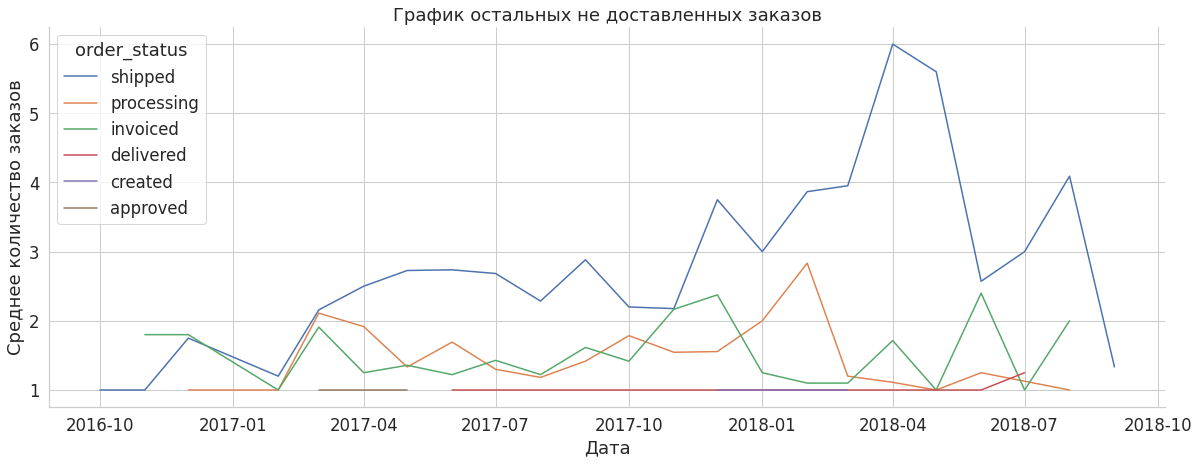

In [45]:
sns.lineplot(data=not_delivered_by_month_det.query('order_status != "canceled" and order_status != "unavailable"'), x='date', y='mean_amount', hue='order_status')
plt.title('График остальных не доставленных заказов')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
sns.despine()  # убрать часть рамки графика
plt.show()

#### Мы можем заметить, что помимо отмененных и недоступных заказов есть много заказов которые имеют статус shipped, но так и не получили даты фактического получения клиентом. Также есть и небольшое количество заказов из месяца в месяц которые не получили свой статус доставки. Точную причину понять мы не можем, возможно это какие-то сбои в сервисе.

# ВОПРОС 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

Для получения такой детализации нам понадобится информация из двух таблиц - orders (Таблица заказов) и order_items (с товарами входящими в заказ), давайте их объединим

In [46]:
orders_by_days = orders.merge(order_items, on='order_id')
orders_by_days.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Возьмем дату покупки и переведем ее в datetime

In [47]:
orders_by_days['order_purchase_timestamp'] =orders_by_days['order_purchase_timestamp'].apply(pd.to_datetime)

Добавим колонку в которой укажем день недели в который каждый товар куплен

In [48]:
orders_by_days['day_of_week'] = orders_by_days['order_purchase_timestamp'].dt.day_name()
orders_by_days['day_of_week']

0            Monday
1           Tuesday
2         Wednesday
3          Saturday
4           Tuesday
            ...    
112645      Tuesday
112646       Sunday
112647       Monday
112648       Monday
112649     Thursday
Name: day_of_week, Length: 112650, dtype: object

Оставим в нашей таблице только графу с уникальным идентификатором товара и днем недели в который он куплен

In [49]:
orders_by_days_filter = orders_by_days[['product_id', 'day_of_week']]
orders_by_days_filter.head()

,product_id,day_of_week
0,87285b34884572647811a353c7ac498a,Monday
1,595fac2a385ac33a80bd5114aec74eb8,Tuesday
2,aa4383b373c6aca5d8797843e5594415,Wednesday
3,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday


Посчитаем количество дней недели для каждого товара

In [50]:
orders_by_days_filter = orders_by_days_filter.groupby(['product_id', 'day_of_week']).size().reset_index().rename(columns={0:'count'})
orders_by_days_filter.head()

,product_id,day_of_week,count
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


Переведем таблицу в сводную по дням недели

In [51]:
orders_by_days_pivot = orders_by_days_filter.pivot(index='product_id', columns='day_of_week', values='count').fillna(0)
orders_by_days_pivot.head()

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,1.0,0.0,0.0,0.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,1.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,1.0,0.0,0.0,0.0,0.0,0.0,1.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Добавим дополнительную колонку в которой будет день с максимальным значением покупок

In [52]:
orders_by_days_pivot['max_day']=orders_by_days_pivot.idxmax(axis=1)
orders_by_days_pivot

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,max_day
product_id,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sunday
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuesday
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Thursday
000b8f95fcb9e0096488278317764d19,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Friday
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuesday
...,...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Saturday
fff81cc3158d2725c0655ab9ba0f712c,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Monday
fff9553ac224cec9d15d49f5a263411f,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Friday


Получим наш финальный датафрейм

In [53]:
orders_by_days_pivot = orders_by_days_pivot.reset_index()
orders_by_days_pivot[['product_id', 'max_day']]

day_of_week,product_id,max_day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Saturday
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


#### У нас есть дни недели в которые было куплено одинаковое количество товаров, но так как в задании необходимо указать конкретный день, то можно оставить любой из них по желанию

# ВОПРОС 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

Для получения ответа на этот вопрос нам необходимо объединить таблицу customers и orders

In [54]:
customers_with_orders = customers.merge(orders, on='customer_id')
customers_with_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Переведем дату оплаты в нужный нам формат

In [55]:
customers_with_orders['order_purchase_timestamp'] = customers_with_orders['order_purchase_timestamp'].apply(pd.to_datetime)
customers_with_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Приведем дату покупки к началу месяца

In [56]:
customers_with_orders['order_purchase_timestamp'] = pd.to_datetime(customers_with_orders.order_purchase_timestamp).dt.to_period('M').dt.to_timestamp()
customers_with_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-01,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-01,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-01,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-01,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-01,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Оставим только интересующие нас колонки

In [57]:
purchases_by_week = customers_with_orders.loc[:, ['customer_unique_id','customer_id', 'order_purchase_timestamp']]
purchases_by_week.head()

,customer_unique_id,customer_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-01
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-01
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-01
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-01
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-01


Посчитаем количество покупок для каждого пользователя в месяц

In [58]:
purchases_by_week = purchases_by_week \
    .groupby(['customer_unique_id', 'order_purchase_timestamp'], as_index=False) \
    .agg({'customer_id':'count'}) \
    .rename(columns={'customer_id':'purchases'})
purchases_by_week.head()

,customer_unique_id,order_purchase_timestamp,purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1


Посчитаем среднее количество покупок для каждого пользовтеля в каждом месяце

In [59]:
purchases_by_week = purchases_by_week \
    .groupby(['customer_unique_id', 'order_purchase_timestamp'], as_index=False) \
    .agg({'purchases':'mean'}) \
    .rename(columns={'purchases':'mean_purchases_by_mounth'}) \

Посчитаем количество недель в каждом месяце

In [60]:
purchases_by_week['weeks'] = purchases_by_week.order_purchase_timestamp.apply(lambda x: x.days_in_month / 7)
purchases_by_week.head()

,customer_unique_id,order_purchase_timestamp,mean_purchases_by_mounth,weeks
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,4.285714


Разделим среднее число покупок для пользователя в каждом месяце на количество недель

In [61]:
purchases_by_week['by_week_by_mounth'] = purchases_by_week.mean_purchases_by_mounth / purchases_by_week.weeks

Получим колонку с количеством в среднем покупок в неделю (по месяцам)

In [62]:
purchases_by_week.head()

,customer_unique_id,order_purchase_timestamp,mean_purchases_by_mounth,weeks,by_week_by_mounth
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,4.285714,0.233333


# ВОПРОС 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц

Еще раз смерджим две исходные таблицы

In [63]:
customers_with_orders = customers.merge(orders, on='customer_id')
customers_with_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Переведем колонку в datetime

In [64]:
customers_with_orders['order_purchase_timestamp'] = customers_with_orders['order_purchase_timestamp'].apply(pd.to_datetime)
customers_with_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Оставим только нужные нам данные

In [65]:
df_5 = customers_with_orders.loc[:, ['customer_unique_id', 'order_purchase_timestamp']]

In [66]:
df_5.head()

,customer_unique_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30


Группировка данных по периоду заказа

In [67]:
df_5['order_period'] = df_5.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))
df_5.head()

,customer_unique_id,order_purchase_timestamp,order_period
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,2018-07


Офильтруем нужный период времени

In [68]:
df_5 = df_5.query('order_purchase_timestamp > "2017-01-01" & order_period < "2017-12-01"')

Группировка данных по первой покупке клиента

In [69]:
df_5.set_index('customer_unique_id', inplace=True)
df_5['JoinMonth'] = df_5.groupby(level=0)['order_purchase_timestamp'].min().apply(lambda x: x.strftime('%Y-%m')) 
df_5.reset_index(inplace=True)
df_5.insert(len(df_5.columns), 'TotalOrders', 0, allow_duplicates=False)
df_5.head()

,customer_unique_id,order_purchase_timestamp,order_period,JoinMonth,TotalOrders
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05,2017-05,0
1,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:14:31,2017-09,2017-09,0
2,57b2a98a409812fe9618067b6b8ebe4f,2017-11-16 19:29:02,2017-11,2017-11,0
3,2a7745e1ed516b289ed9b29c7d0539a5,2017-11-27 17:23:20,2017-11,2017-11,0
4,918dc87cd72cd9f6ed4bd442ed785235,2017-09-09 09:54:57,2017-09,2017-09,0


Объединим группы

In [70]:
grouped = df_5.groupby(['JoinMonth', 'order_period'])
# количество уникальных пользователей и общее количество заказов и выручка за период
cohorts = grouped.agg({'customer_unique_id': pd.Series.nunique, 'TotalOrders': pd.Series.count})
# переименуем некоторые столбцы для большей наглядности
cohorts.rename(columns={'customer_unique_id': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers  TotalOrders
JoinMonth order_period                         
2017-01   2017-01              765          800
          2017-02                3            3
          2017-03                2            2
          2017-04                1            1
          2017-05                3            3

Упорядочивание

In [71]:
def cohort_period(df):
 df['CohortPeriod'] = np.arange(len(df)) + 1 # отсчет с 1
 return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  TotalOrders  CohortPeriod
JoinMonth order_period                                       
2017-01   2017-01              765          800             1
          2017-02                3            3             2
          2017-03                2            2             3
          2017-04                1            1             4
          2017-05                3            3             5

Считаем Retention

In [72]:
# переиндексируем DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['JoinMonth', 'CohortPeriod'], inplace=True)
# создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['TotalUsers'].groupby(level=1).first()
cohort_group_size.head()

CohortPeriod
1    765
2      3
3      2
4      1
5      3
Name: TotalUsers, dtype: int64

In [73]:
cohorts['TotalUsers'].head()

JoinMonth  CohortPeriod
2017-01    1               765
           2                 3
           3                 2
           4                 1
           5                 3
Name: TotalUsers, dtype: int64

In [74]:
cohorts['TotalUsers'].unstack(1)

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11
JoinMonth,,,,,,,,,,,
2017-01,765.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,3.0,1.0
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,NaN
2017-04,2353.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,NaN,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,NaN,NaN,NaN
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,NaN,NaN,NaN,NaN
2017-07,3895.0,20.0,14.0,10.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN
2017-08,4184.0,29.0,14.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4131.0,28.0,22.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Строим визуализацию

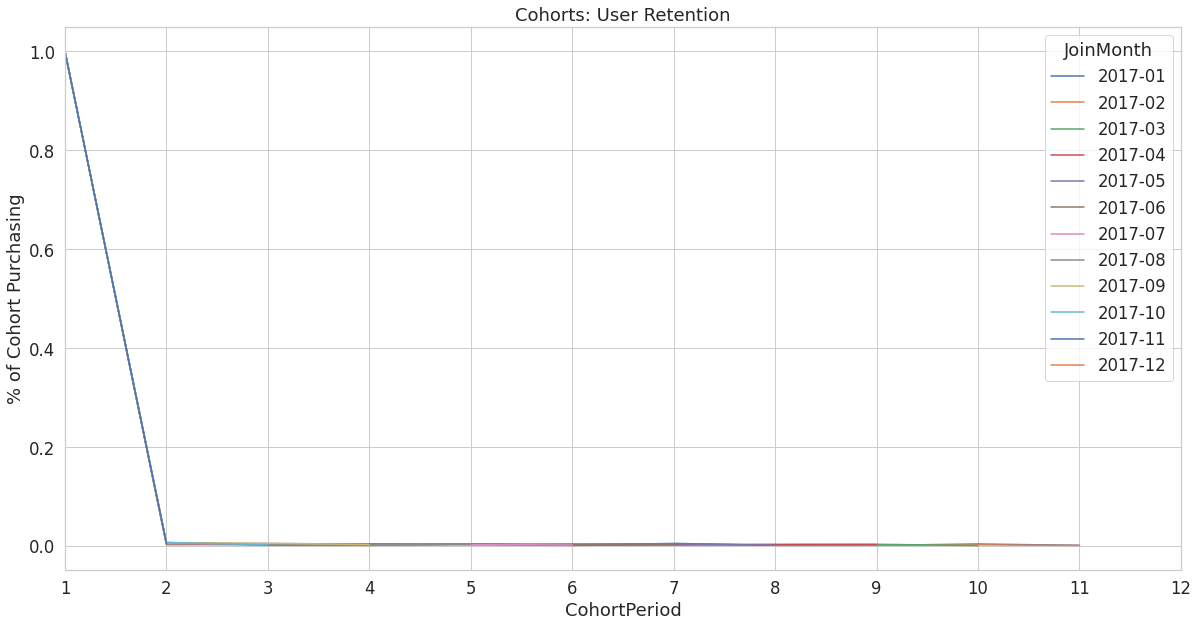

In [75]:
# переиндексируем DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['JoinMonth','CohortPeriod'], inplace=True) #транспонировали, просто поменяв местами JoinMonth и CohortPeriod и далее добавим axis=1
# создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohorts['TotalUsers'].unstack(0)
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention[['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12']].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1)) # разбивка оси X
plt.xlim(1, 12) #ось X
plt.ylabel('% of Cohort Purchasing');

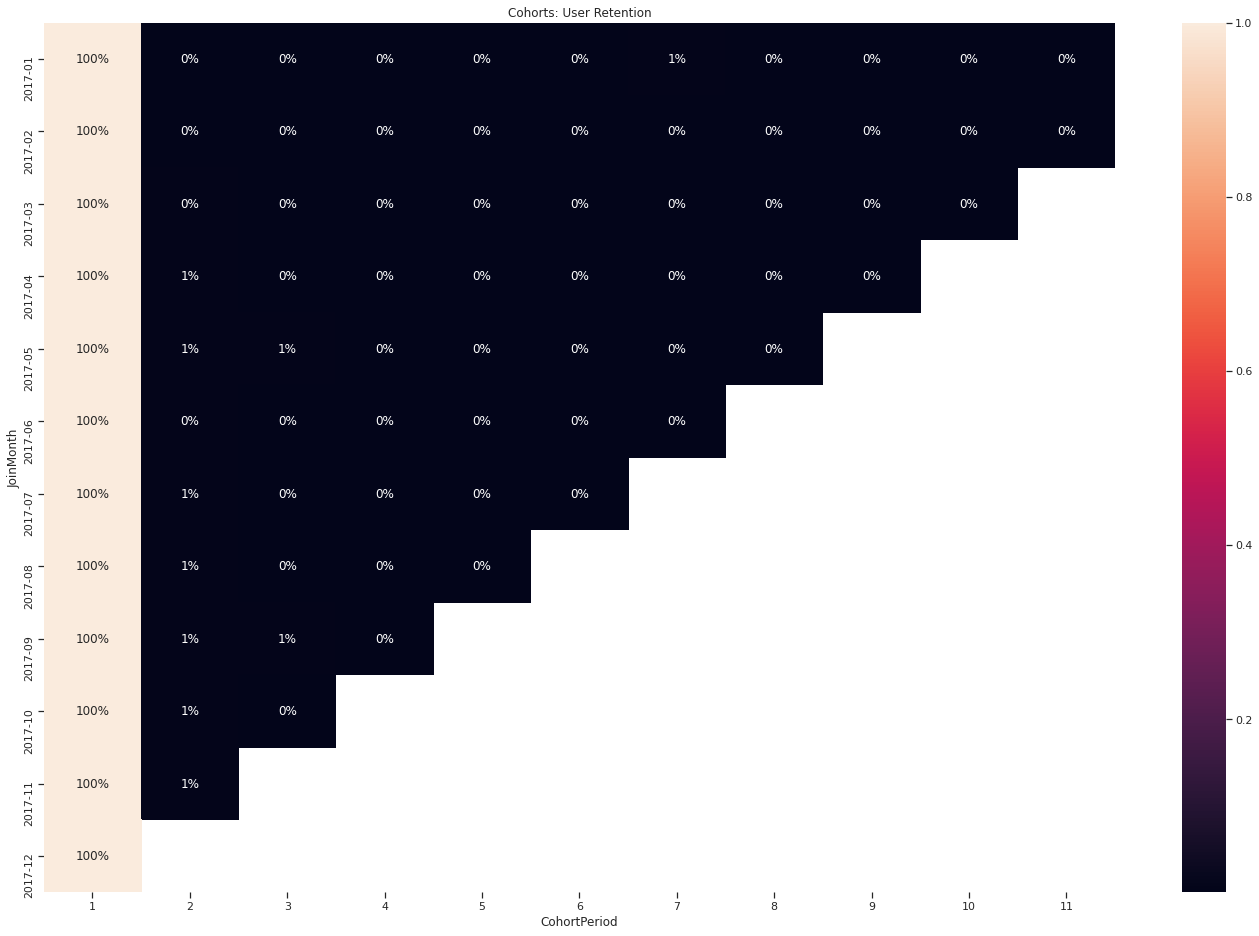

In [76]:
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

##### В общем и целом у нас достаточно низкий ретенш, большая часть пользователей сделала не больше 1 покупки
##### Когортный анализ показал что самый высокий ретенш на 3й месяц у когорт мая - 2017-05-01  и сентября - 2017-09-01 

# Вопрос 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

Сделаем соберем таблицу в которой будут следующие колонки - номер заказа, дата покупки, уникальны id, сумма покупки

Но для этого сначала посчитаем сумму за каждый заказ

In [77]:
order_items_sum = order_items.groupby('order_id', as_index=False).agg({'price': 'sum'})
order_items_sum.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


Соединим таблицу из предыдущего шага с уже смердженой customers_with_orders

In [78]:
df_rfm = customers_with_orders.merge(order_items_sum, on='order_id')
df_rfm.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,230.00


Оставим только нужные столбцы

In [79]:
df_rfm = df_rfm.loc[:,('customer_unique_id', 'order_id', 'order_purchase_timestamp', 'price')]
# Переименуем для удобства работы с примером
orders = df_rfm.rename(columns={'customer_unique_id': 'CustomerID', 'order_id':'InvoiceNo', 'order_purchase_timestamp': 'InvoiceDate', 'price': 'Price'})
orders.head()

,CustomerID,InvoiceNo,InvoiceDate,Price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00


Зададим параметр последней покупки в датафрейме

In [80]:
last_date = orders.InvoiceDate.max()
last_date 

Timestamp('2018-09-03 09:06:57')

Добавим колонку с разницей дней от даты заказа до последней даты

In [81]:
orders['DaysSinceOrder'] = orders['InvoiceDate'].apply(lambda x: (last_date  - x).days)
orders.head()

,CustomerID,InvoiceNo,InvoiceDate,Price,DaysSinceOrder
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99,474
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00,233
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94,106
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94,173
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00,35


Посчитаем Recency и Frequency

In [83]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # Количество дней с последнего заказа (Recency)
    'InvoiceDate': lambda x: len([d for d in x if d <= last_date]), # Общее количество заказов за все время (Frequency)
}
rfm = orders.groupby('CustomerID').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'InvoiceDate': 'Frequency'}, inplace=True)
rfm.head()

,CustomerID,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1
2,0000f46a3911fa3c0805444483337064,541,1
3,0000f6ccb0745a6a4b88665a16c9f078,325,1
4,0004aac84e0df4da2b147fca70cf8255,292,1


Теперь добавим Monetary для каждого покупателя

In [84]:
rfm['Monetary'] = rfm['CustomerID'].apply(lambda x: orders[(orders['CustomerID'] == x) & \
                                                           (orders['InvoiceDate'] <= last_date)]\
                                                           ['Price'].sum())
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


Определим квантили распределения RFM которые покажут границы метрик

In [85]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 97.0, 0.4: 181.0, 0.6: 272.0, 0.8: 388.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

Из-за неравномерного распределения количества заказов мы получаем одинаковые значения для квантилей Frequency

Поэтому посмотрим на распределение количества покупок и вручную определим сегментацию

In [86]:
rfm.Frequency.value_counts()

1     92507
2      2673
3       192
4        29
5         9
6         5
7         3
16        1
9         1
Name: Frequency, dtype: int64

#### Сделаем ручную  сегментацию для Frequency вместо квантилей:
##### F = 1 от 0 и до 1 покупки
##### F = 2 от 1 и до 2 покупки
##### F = 3 от 2 и до 3 покупки
##### F = 4 от 4 и до 5 покупки
##### F = 5 от 5 и более покупок

#### Для Recency и Monetary распределение по квантилям меня устравивает
##### R = 1 от 0 и до 97 дней
##### R = 2 от 97 и до 181 дня
##### R = 3 от 181 и до 272 дней
##### R = 4 от 272  и до 388 дней
##### R = 5 от 388 и более дней

##### M = 1 от 0 и до 39.9 долларов
##### M = 2 от 39.9 и до 69.9 долларов
##### M = 3 от 69.9 и до 109.9 долларов
##### M = 4 от 109.9  и до 179.9 долларов
##### M = 5 от 179.9 и более долларов

Добавим функции для назначения рангов в зависимости от значений Recency, Frequency, Monetary

In [87]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def f_score(x, c):
    if x <= 1:
        return 1
    elif x <= 2:
        return 2
    elif x <= 3:
        return 3
    elif x <= 4:
        return 4
    else:
        return 5       
        
def m_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

Теперь применим указанные выше функции 

In [88]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x, 'Monetary'))

Получим сегменты пользователей по RFM значениям

In [90]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,5,215


Посмотрим сколько у нас получилось групп RFM

In [91]:
rfm['RFM Score'].nunique()

80

Визуализируем наше распределение покупателей от R и F

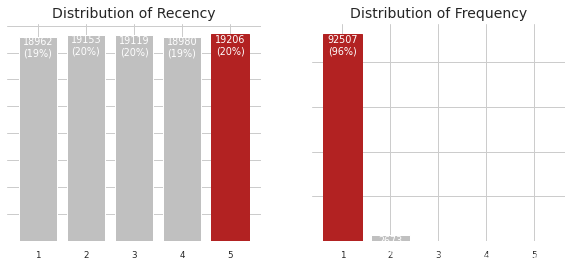

In [93]:
sns.set(
    font_scale=0.8,
    style = 'whitegrid',
    rc = {'figure.figsize':(20,7)}
)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

Визуализируем наше распределение M в зависимости от RF

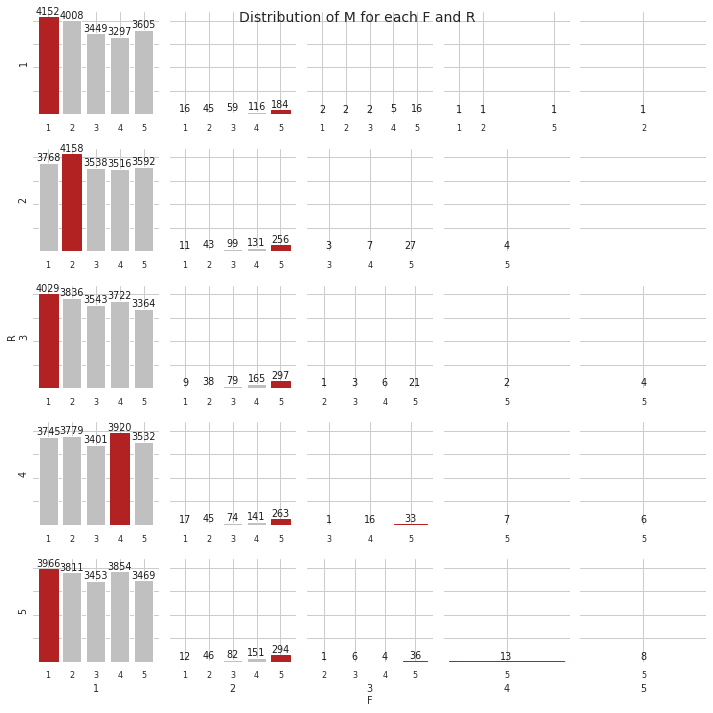

In [94]:
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()